In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
from datetime import datetime
import itertools
import gc
import pickle
import math

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
import lightgbm as lgb

%matplotlib inline

# 3. Modeling

In [ ]:
# 피클파일 불러오기
data1 = pd.read_pickle('data1.pkl')
data1.head()

,date_block_num,shop_id,item_id,ID,city_id,item_category_id,type_id,sub_id,item_cnt_month,shop_cnt_month,...,date_shop_avg_item_cnt_lag_1,date_shop_avg_item_cnt_lag_3,date_shop_avg_item_cnt_lag_6,date_shop_avg_item_cnt_lag_12,date_cat_avg_item_cnt,date_shop_cat_avg_item_cnt,date_city_avg_item_cnt,date_item_city_avg_item_cnt,date_item_city_avg_item_cnt_lag_1,month
4478844,12,2,27,-1,0,19,5,12,0.0,883.0,...,0.151489,0.095398,0.09613,0.141724,0.752930,0.793945,0.117004,0.0,0.0,0
4478845,12,2,30,-1,0,40,11,6,0.0,883.0,...,0.151489,0.095398,0.09613,0.000000,0.261230,0.041809,0.117004,0.0,0.0,0
4478846,12,2,31,-1,0,37,11,1,0.0,883.0,...,0.151489,0.095398,0.09613,0.000000,0.194824,0.052246,0.117004,0.0,0.0,0
4478847,12,2,32,-1,0,40,11,6,1.0,883.0,...,0.151489,0.095398,0.09613,0.141724,0.261230,0.041809,0.117004,1.0,0.0,0
4478848,12,2,33,-1,0,37,11,1,1.0,883.0,...,0.151489,0.095398,0.09613,0.141724,0.194824,0.052246,0.117004,1.0,1.0,0


## 1) Scaling
  - data1을 StandardScaler 사용하여 scaling 

In [ ]:
# Standard Scaler

col_list =[]
for i in data1.columns:
    if ('id' in i) | ('ID' in i) | ('date_block_num' in i) | (i == 'season') | (i == 'month') | (i == 'item_cnt_month'):
        pass
    else:
        col_list.append(i)
col_list
data = data1.copy()

for i in col_list:
    data.loc[:,i] = StandardScaler().fit_transform(np.array(data.loc[:,i]).reshape(-1,1))

C:\Users\khb16\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
C:\Users\khb16\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
C:\Users\khb16\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
C:\Users\khb16\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


In [ ]:
data.head()

,date_block_num,shop_id,item_id,ID,city_id,item_category_id,type_id,sub_id,item_cnt_month,shop_cnt_month,...,date_shop_avg_item_cnt_lag_1,date_shop_avg_item_cnt_lag_3,date_shop_avg_item_cnt_lag_6,date_shop_avg_item_cnt_lag_12,date_cat_avg_item_cnt,date_shop_cat_avg_item_cnt,date_city_avg_item_cnt,date_item_city_avg_item_cnt,date_item_city_avg_item_cnt_lag_1,month
0,12,2,27,-1,0,19,5,12,0.0,-0.0,...,-0.368408,-0.530762,-0.431885,-0.030106,0.934082,0.758789,-1.001953,-0.246338,-0.246948,0
1,12,2,32,-1,0,40,11,6,1.0,-0.0,...,-0.368408,-0.530762,-0.431885,-0.030106,-0.051300,-0.366455,-1.001953,0.612305,-0.246948,0
2,12,2,33,-1,0,37,11,1,1.0,-0.0,...,-0.368408,-0.530762,-0.431885,-0.030106,-0.184448,-0.350830,-1.001953,0.612305,0.579590,0
3,12,2,34,-1,0,40,11,6,0.0,-0.0,...,-0.368408,-0.530762,-0.431885,-0.030106,-0.051300,-0.366455,-1.001953,-0.246338,-0.246948,0
4,12,2,40,-1,0,57,13,10,0.0,-0.0,...,-0.368408,-0.530762,-0.431885,-0.030106,-0.375732,-0.422119,-1.001953,-0.246338,-0.246948,0


- train/ valid/ test data로 분리

In [ ]:
x_train = data[data['date_block_num'] < 33].drop(['item_cnt_month'], axis=1)
y_train = data[data['date_block_num'] < 33]['item_cnt_month']
x_valid = data[data['date_block_num'] == 33].drop(['item_cnt_month'], axis=1)
y_valid = data[data['date_block_num'] == 33]['item_cnt_month']
x_test = data[data['date_block_num'] == 34].drop(['item_cnt_month'], axis=1)

In [ ]:
x_train.shape, y_train.shape, x_valid.shape, y_valid.shape, x_test.shape

((6167532, 39), (6167532,), (238084, 39), (238084,), (214200, 39))

In [ ]:
data.columns

Index(['date_block_num', 'shop_id', 'item_id', 'ID', 'city_id',
       'item_category_id', 'type_id', 'sub_id', 'item_cnt_month',
       'shop_cnt_month', 'category_cnt_month', 'city_cnt_month',
       'sub_cnt_month', 'item_price', 'season', 'season_avg_item_cnt',
       'season_shop_avg_cnt', 'season_city_avg_cnt', 'season_sub_avg_cnt',
       'item_cnt_month_lag_1', 'item_cnt_month_lag_3', 'item_cnt_month_lag_6',
       'item_cnt_month_lag_12', 'date_avg_item_cnt', 'date_avg_item_cnt_lag_1',
       'date_avg_item_cnt_lag_3', 'date_avg_item_cnt_lag_6',
       'date_avg_item_cnt_lag_12', 'date_item_avg_item_cnt',
       'date_shop_avg_item_cnt', 'date_shop_avg_item_cnt_lag_1',
       'date_shop_avg_item_cnt_lag_3', 'date_shop_avg_item_cnt_lag_6',
       'date_shop_avg_item_cnt_lag_12', 'date_cat_avg_item_cnt',
       'date_shop_cat_avg_item_cnt', 'date_city_avg_item_cnt',
       'date_item_city_avg_item_cnt', 'date_item_city_avg_item_cnt_lag_1',
       'month'],
      dtype='object')

## 2) 변수 분석

- Heatmap 이용하여 변수 간 상관관계 파악

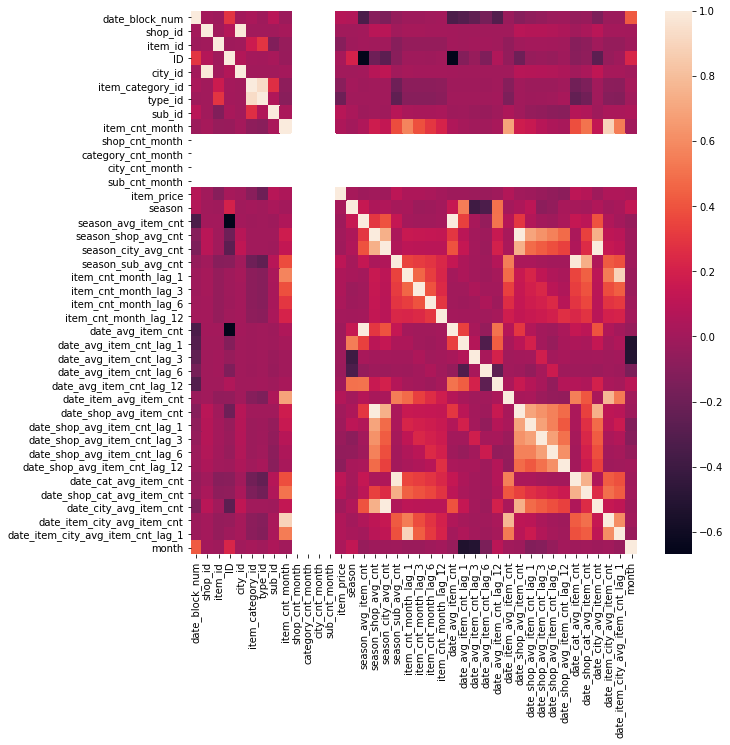

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr())
plt.show()

C:\Users\khb16\anaconda3\lib\site-packages\seaborn\matrix.py:194: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\khb16\anaconda3\lib\site-packages\seaborn\matrix.py:199: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


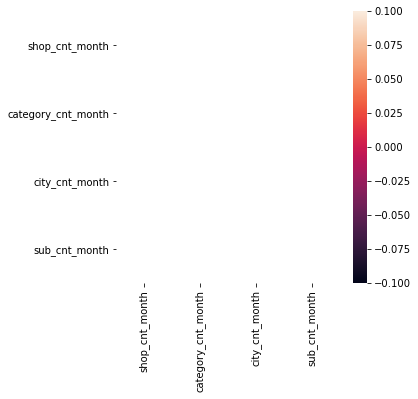

In [ ]:
# 위 Heatmap에서 흰색 부분만 뽑아 다시 파악
c = data[['shop_cnt_month', 'category_cnt_month', 'city_cnt_month','sub_cnt_month']]
plt.figure(figsize=(5,5))
sns.heatmap(c.corr())
plt.show()

- pairplot 그린 후 변수간 관계 파악

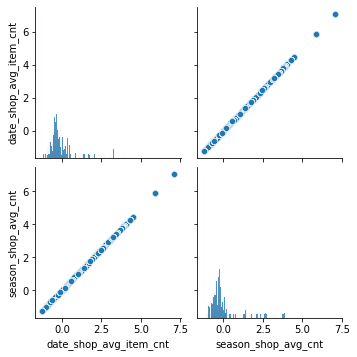

In [ ]:
pp = data[['date_shop_avg_item_cnt','season_shop_avg_cnt']]
sns.pairplot(pp)
plt.show()

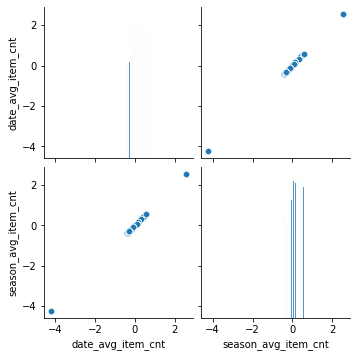

In [ ]:
pp1 = data[['date_avg_item_cnt','season_avg_item_cnt']]
sns.pairplot(pp1)
plt.show()

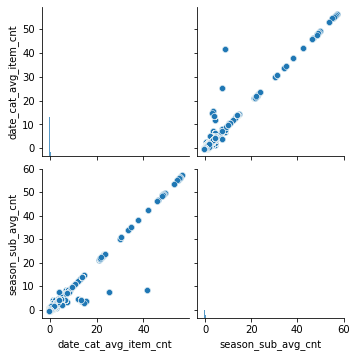

In [ ]:
pp2 = data[['date_cat_avg_item_cnt','season_sub_avg_cnt']]
sns.pairplot(pp2)
plt.show()

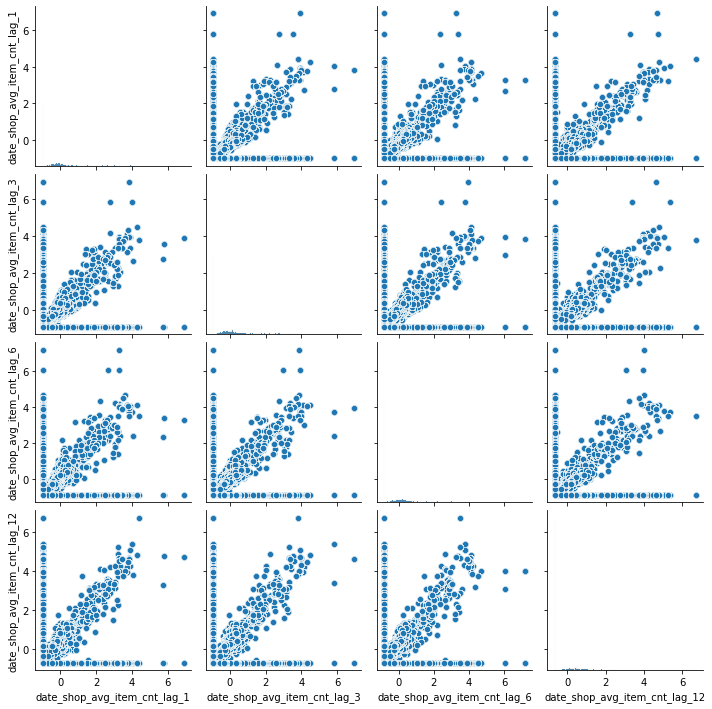

In [ ]:
pp3 = data[['date_shop_avg_item_cnt_lag_1','date_shop_avg_item_cnt_lag_3','date_shop_avg_item_cnt_lag_6',
           'date_shop_avg_item_cnt_lag_12']]
sns.pairplot(pp3)
plt.show()

- ols로 유의하지 않은 변수 파악

In [ ]:
import statsmodels.api as sm
x_train2 = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train2)
result = model.fit()
result.summary()

C:\Users\khb16\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         item_cnt_month   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                 1.070e+06
Date:                Wed, 02 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:15:43   Log-Likelihood:            -4.8007e+06
No. Observations:             6167532   AIC:                         9.601e+06
Df Residuals:                 6167500   BIC:                         9.602e+06
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
date_block_num                     4.689e-05    4.7e-05      0.998      0.318   -4.52e-05       0.000
shop_id                              -0.0004   7.74e-05     -4.823      0.000      -0.001      -0.000
item_id                            1.046e-07   3.72e-08      2.817      0.005    3.18e-08    1.77e-07
ID                                   -0.2858      0.002   -180.510      0.000      -0.289      -0.283
city_id                               0.0009      0.000      5.104      0.000       0.001       0.001
item_category_id                      0.0002   4.89e-05      3.350      0.001     6.8e-05       0.000
type_id                              -0.0004      0.000     -1.593      0.111      -0.001    9.61e-05
sub_id                               -0.0002   1.26e-05    -12.014      0.000      -0.000      -0.000
shop_cnt_month                      4.39e-17   1.57e-18     27.956      0.000    4.08e-17     4.7e-17
category_cnt_month                -2.025e-16   3.72e-19   -543.908      0.000   -2.03e-16   -2.02e-16
city_cnt_month                    -3.679e-16   2.61e-18   -140.866      0.000   -3.73e-16   -3.63e-16
sub_cnt_month                     -4.112e-16   2.48e-18   -165.758      0.000   -4.16e-16   -4.06e-16
item_price                           -0.0017      0.000     -7.396      0.000      -0.002      -0.001
season                               -0.0003      0.000     -0.970      0.332      -0.001       0.000
season_avg_item_cnt                   0.0032      0.000      6.885      0.000       0.002       0.004
season_shop_avg_cnt                   0.0576      0.000    257.288      0.000       0.057       0.058
season_city_avg_cnt                  -0.0492      0.000   -283.408      0.000      -0.049      -0.049
season_sub_avg_cnt                   -0.0007      0.001     -0.516      0.606      -0.003       0.002
item_cnt_month_lag_1                  0.5018      0.000   1019.445      0.000       0.501       0.503
item_cnt_month_lag_3                  0.0300      0.000    116.042      0.000       0.029       0.030
item_cnt_month_lag_6                  0.0154      0.000     62.052      0.000       0.015       0.016
item_cnt_month_lag_12                 0.0100      0.000     41.859      0.000       0.010       0.010
date_avg_item_cnt                     0.0032      0.000      6.885      0.000       0.002       0.004
date_avg_item_cnt_lag_1               0.0010      0.000      2.131      0.033    7.74e-05       0.002
date_avg_item_cnt_lag_3               0.0015      0.000      3.854      0.000       0.001       0.002
date_avg_item_cnt_lag_6               0.0008      0.000      3.021      0.003       0.000       0.001
date_avg_item_cnt_lag_12              0.0007      0.001      1.007      0.314      -0.001       0.002
date_item_avg_item_cnt 

## 3) 모델링

### 1. Linear Regression

- features 변수 선택

In [ ]:
data = data[['date_block_num', 'shop_id','item_id', 'ID', 'city_id','item_category_id', 'type_id', 
            'sub_id', 'shop_cnt_month', 'item_cnt_month', 'category_cnt_month', 'city_cnt_month', 
            'sub_cnt_month', 'item_price','season','season_avg_item_cnt','season_shop_avg_cnt',
           'season_city_avg_cnt', 'season_sub_avg_cnt', 'item_cnt_month_lag_1','item_cnt_month_lag_3', 
            'item_cnt_month_lag_6', 'item_cnt_month_lag_12','date_avg_item_cnt', 'date_avg_item_cnt_lag_1',
           'date_avg_item_cnt_lag_3', 'date_avg_item_cnt_lag_6', 'date_avg_item_cnt_lag_12','date_item_avg_item_cnt',
           'date_shop_avg_item_cnt', 'date_shop_avg_item_cnt_lag_1',
           'date_shop_avg_item_cnt_lag_3', 'date_shop_avg_item_cnt_lag_6',
           'date_shop_avg_item_cnt_lag_12', 'date_cat_avg_item_cnt',
           'date_shop_cat_avg_item_cnt', 'date_city_avg_item_cnt',
           'date_item_city_avg_item_cnt', 'date_item_city_avg_item_cnt_lag_1','month']]

- code

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

- 성능평가

In [ ]:
print('rmse:', math.sqrt(mean_squared_error(y_valid, lr.predict(x_valid))))
print('r2_score:', r2_score(y_valid, lr.predict(x_valid)))

rmse: 0.5815732609143649  
r2_score: 0.7969141593353979

### 2. Random Forest

- features 변수 선택

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
datam = data[['date_block_num','shop_id','item_id','ID','city_id',
'item_category_id','type_id','sub_id','item_cnt_month',
'item_price','season','season_avg_item_cnt',
'season_shop_avg_cnt','season_city_avg_cnt','season_sub_avg_cnt',
'item_cnt_month_lag_1','item_cnt_month_lag_3','item_cnt_month_lag_6',
'item_cnt_month_lag_12','date_avg_item_cnt','date_avg_item_cnt_lag_1',
'date_avg_item_cnt_lag_3','date_avg_item_cnt_lag_6',
'date_avg_item_cnt_lag_12','date_item_avg_item_cnt',
'date_shop_avg_item_cnt','date_shop_avg_item_cnt_lag_1',
'date_shop_avg_item_cnt_lag_3','date_shop_avg_item_cnt_lag_6',
'date_shop_avg_item_cnt_lag_12','date_cat_avg_item_cnt',
'date_shop_cat_avg_item_cnt','date_city_avg_item_cnt',
'date_item_city_avg_item_cnt',
'month']]

- code

In [ ]:
X_train = datam[datam.date_block_num < 33].drop(['item_cnt_month','ID'], axis=1)
Y_train = datam[datam.date_block_num < 33]['item_cnt_month']
X_valid = datam[datam.date_block_num == 33].drop(['item_cnt_month','ID'], axis=1)
Y_valid = datam[datam.date_block_num == 33]['item_cnt_month']
X_test = datam[datam.date_block_num == 34].drop(['item_cnt_month','ID'], axis=1)

In [ ]:
model = RandomForestRegressor()

%time model.fit(X_train,Y_train)

- 성능평가

In [ ]:
model.score(X_train,Y_train)

In [ ]:
model.score(X_valid,Y_valid)

In [ ]:
mean_squared_error(Y_valid,y_pred) ** 0.5

r2 = 0.7169696632356585  
rmse = 0.6865116472406079

### 3. Gradient Boosting

- features 변수 선택

In [ ]:
data = data[['date_block_num', 'shop_id','item_id', 'city_id','item_category_id', 'type_id', 
            'sub_id',  'item_cnt_month','item_price','season','season_avg_item_cnt','season_shop_avg_cnt',
           'season_city_avg_cnt', 'season_sub_avg_cnt', 'item_cnt_month_lag_1','item_cnt_month_lag_3', 
            'item_cnt_month_lag_6', 'item_cnt_month_lag_12','date_avg_item_cnt', 'date_avg_item_cnt_lag_1',
           'date_avg_item_cnt_lag_3', 'date_avg_item_cnt_lag_6', 'date_avg_item_cnt_lag_12','date_item_avg_item_cnt',
           'date_shop_avg_item_cnt', 'date_shop_avg_item_cnt_lag_1',
           'date_shop_avg_item_cnt_lag_3', 'date_shop_avg_item_cnt_lag_6',
           'date_shop_avg_item_cnt_lag_12', 'date_cat_avg_item_cnt',
           'date_shop_cat_avg_item_cnt', 'date_city_avg_item_cnt',
           'date_item_city_avg_item_cnt', 'date_item_city_avg_item_cnt_lag_1']]

- code

In [ ]:
grad_boost = GradientBoostingRegressor(learning_rate = 0.1, 
                                       n_estimators = 100, 
                                       random_state = 42)
grad_boost.fit(x_train, y_train)

- 성능평가

In [ ]:
print('rmse:', math.sqrt(mean_squared_error(y_valid, grad_boost.predict(x_valid))))
print('r2_score:', r2_score(y_valid, grad_boost.predict(x_valid)))

rmse: 0.5216990484414401  
r2_score: 0.8365778676780644

### 4. XGBoost

- features 변수 선택

In [ ]:
from xgboost import XGBRegressor
from xgboost import plot_importance

datam = data[['date_block_num','shop_id','item_id','ID','city_id',
'item_category_id','type_id','sub_id','item_cnt_month',
'item_price','season','season_avg_item_cnt',
'season_shop_avg_cnt','season_city_avg_cnt','season_sub_avg_cnt',
'item_cnt_month_lag_1','item_cnt_month_lag_3','item_cnt_month_lag_6',
'item_cnt_month_lag_12','date_avg_item_cnt','date_avg_item_cnt_lag_1',
'date_avg_item_cnt_lag_3','date_avg_item_cnt_lag_6',
'date_avg_item_cnt_lag_12','date_item_avg_item_cnt',
'date_shop_avg_item_cnt','date_shop_avg_item_cnt_lag_1',
'date_shop_avg_item_cnt_lag_3','date_shop_avg_item_cnt_lag_6',
'date_shop_avg_item_cnt_lag_12','date_cat_avg_item_cnt',
'date_shop_cat_avg_item_cnt',
'date_city_avg_item_cnt',
'date_item_city_avg_item_cnt',
'date_item_city_avg_item_cnt_lag_1',
'month']]

X_train = datam[datam.date_block_num < 33].drop(['item_cnt_month','ID'], axis=1)
Y_train = datam[datam.date_block_num < 33]['item_cnt_month']
X_valid = datam[datam.date_block_num == 33].drop(['item_cnt_month','ID'], axis=1)
Y_valid = datam[datam.date_block_num == 33]['item_cnt_month']
X_test = datam[datam.date_block_num == 34].drop(['item_cnt_month','ID'], axis=1)

- code

In [ ]:
modelXGB = XGBRegressor(
    max_depth=10,
    n_estimators=2000,
    min_child_weight=400, 
    colsample_bytree=0.8, 
    subsample=0.5, 
    eta=0.1,
    seed=42)

%time 
modelXGB.fit(X_train, Y_train, 
             eval_metric="rmse",
             eval_set=[(X_train, Y_train), (X_valid, Y_valid)],
             verbose=True)

- 성능평가

In [ ]:
modelXGB.score(X_train,Y_train)

In [ ]:
modelXGB.predict(X_train)

In [ ]:
modelXGB.score(X_valid,Y_valid)

In [ ]:
mean_squared_error(Y_valid,y_pred) ** 0.5

r2 = 0.8000287871737892  
rmse = 0.5574081307483839

### 5. LightGBM

- features 변수 선택

In [ ]:
data = data.drop(columns=['type_id','date_avg_item_cnt_lag_12','season_sub_avg_cnt',
        'season','date_shop_avg_item_cnt_lag_1',
       'date_shop_avg_item_cnt_lag_3', 'date_shop_avg_item_cnt_lag_6',
       'date_shop_avg_item_cnt_lag_12','shop_cnt_month', 'category_cnt_month', 'city_cnt_month',
       'sub_cnt_month','item_price','month','season_shop_avg_cnt','season_avg_item_cnt','sub_id'])

- code

In [ ]:
import lightgbm as lgb

In [ ]:
%%time
# lgb hyper-parameters
params = {'metric': 'rmse',
          'num_leaves': 1023,
          'learning_rate': 0.03,
          'feature_fraction': 0.75,
          'bagging_fraction': 0.75,
          'bagging_freq': 5,
          'force_col_wise' : True,
          'random_state': 10}

cat_features = ['shop_id', 'item_id','city_id', 'item_category_id','ID','date_block_num']


dtrain = lgb.Dataset(x_train, y_train)
dvalid = lgb.Dataset(x_valid, y_valid)

# Train LightGBM model
lgb_model = lgb.train(params=params,
                      train_set=dtrain,
                      num_boost_round=4000,
                      valid_sets=(dtrain, dvalid),
                      early_stopping_rounds=150,
                      categorical_feature=cat_features,
                      verbose_eval=100)

- 성능평가

In [ ]:
y_pred = lgb_model.predict(x_valid).clip(0, 20)
y_test = lgb_model.predict(x_test).clip(0, 20)

In [ ]:
print(r2_score(y_valid, y_pred)) # 0.866
print(math.sqrt(mean_squared_error(y_valid, y_pred))) # 0.414

- R2 : 0.866
- RMSE : 0.414

### 6. MLPRegression

- features 변수 선택

In [ ]:
data = data.drop(columns=['type_id','date_avg_item_cnt_lag_12','season_sub_avg_cnt',
        'season','date_shop_avg_item_cnt_lag_1','date_shop_avg_item_cnt_lag_3', 'date_shop_avg_item_cnt_lag_6',
       'date_shop_avg_item_cnt_lag_12','shop_cnt_month', 'category_cnt_month', 'city_cnt_month',
       'sub_cnt_month','item_price','month','season_shop_avg_cnt','season_avg_item_cnt','sub_id']

- code

In [ ]:
from sklearn.neural_network import MLPRegressor

MLPmodel = MLPRegressor(max_iter=1000, alpha=0.001, n_iter_no_change=10,
                        early_stopping=True, verbose=True, learning_rate_init=0.01,
                        hidden_layer_sizes=(50,50), random_state=10)

y_pred = MLPmodel.predict(x_valid).clip(0, 20)
y_test = MLPmodel.predict(x_test).clip(0, 20)

- 성능평가

In [ ]:
print(r2_score(y_valid, y_pred)) # 0.763
print(math.sqrt(mean_squared_error(y_valid, y_pred))) #0.628

- R2 : 0.800
- RMSE : 0.577

-----------------------------------------

## CODEBOOK

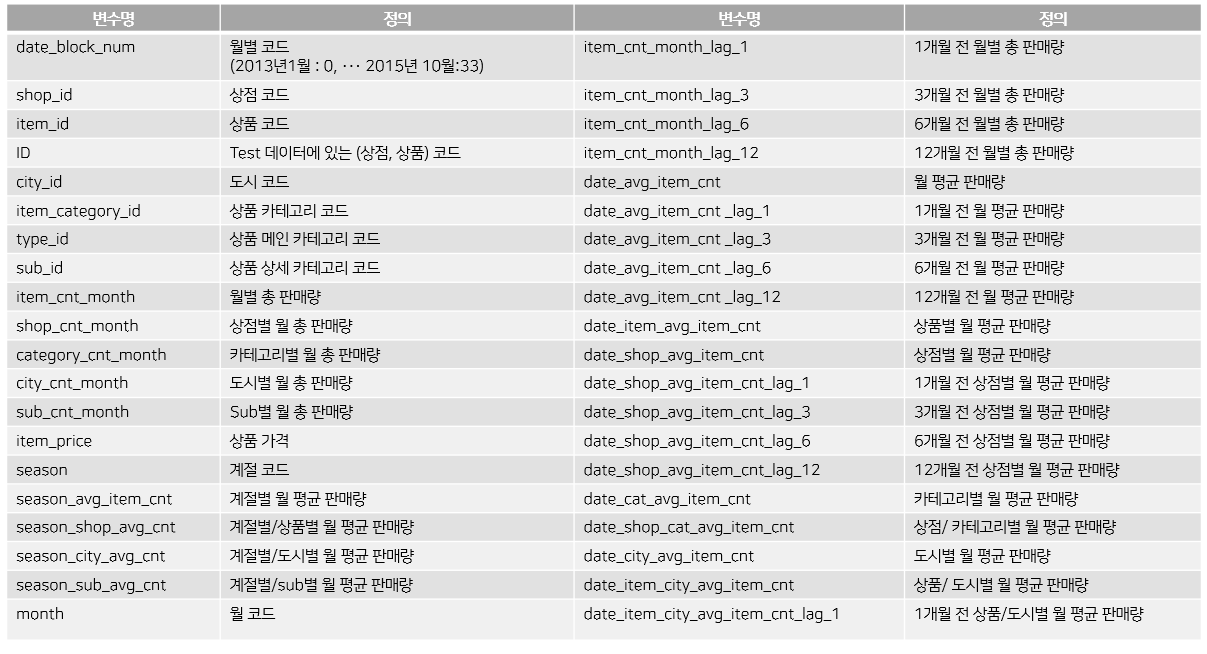